1.用直线划分实现分类

In [86]:
#1.1用与门实现分类
import torch
X=torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=torch.float32)
andgate=torch.tensor([[0],[0],[0],[1]],dtype=torch.float32)
def AND(X):
    w=torch.tensor([-0.2,0.15,0.15],dtype=torch.float32)
    zhat=torch.mv(X,w)
    andhat=torch.tensor([int(x) for x in zhat>=0],dtype=torch.float32)
    return andhat
andhat=AND(X)#使用直线来划分两个类别的点，也就是应用阶跃函数（大于等于0输出1，否则0）
andhat


tensor([0., 0., 0., 1.])

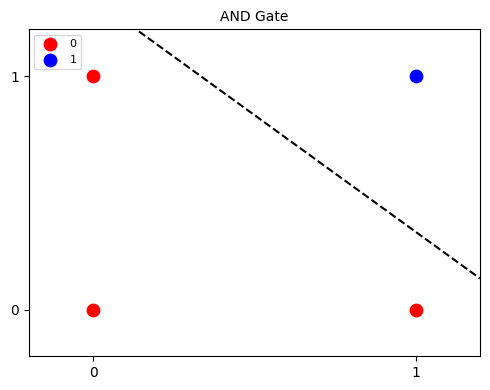

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据（去掉偏置项）
X = np.array([[0,0], [1,0], [0,1], [1,1]])
y = np.array([0, 0, 0, 1])

# 设置权重（与代码一致）
w = np.array([-0.2, 0.15, 0.15])

# 创建小尺寸画布
plt.figure(figsize=(5, 4))  # 原8x6改为5x4

# 只绘制关键元素
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', s=80, label='0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', s=80, label='1')

# 简化决策边界
x_line = np.linspace(-0.2, 1.2, 2)  # 只需两点确定直线
y_line = (-w[0] - w[1]*x_line) / w[2]
plt.plot(x_line, y_line, 'k--', linewidth=1.5)  # 虚线更简洁

# 最小化图表装饰
plt.title("AND Gate", fontsize=10)
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.legend(loc='upper left', fontsize=8)

plt.tight_layout()  # 自动调整间距
plt.show()

In [88]:
#1.2用或门实现分类
import torch
X=torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=torch.float32)
orgate=torch.tensor([[0],[1],[1],[1]],dtype=torch.float32)
def OR(X):
    w=torch.tensor([-0.08,0.15,0.15],dtype=torch.float32)
    zhat=torch.mv(X,w)
    orhat=torch.tensor([int(x) for x in zhat>=0],dtype=torch.float32)
    return orhat
orhat=OR(X)
orhat

tensor([0., 1., 1., 1.])

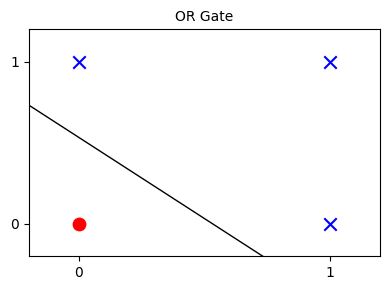

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# 输入数据和权重
X = np.array([[0,0], [1,0], [0,1], [1,1]])
y = np.array([0, 1, 1, 1])
w = np.array([-0.08, 0.15, 0.15])

# 创建小尺寸画布
plt.figure(figsize=(4, 3))  # 更小的图形尺寸

# 绘制点和决策边界
plt.scatter(X[y==0, 0], X[y==0, 1], c='r', s=80, marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b', s=80, marker='x')
x_line = np.array([-0.2, 1.2])
plt.plot(x_line, (-w[0] - w[1]*x_line)/w[2], 'k-', linewidth=1)

# 简化图表元素
plt.title("OR Gate", fontsize=10)
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.tight_layout()

plt.show()

In [90]:
#1.3 用非与门实现
import torch
X=torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]],dtype=torch.float32)
nandgate=torch.tensor([[1],[1],[1],[0]],dtype=torch.float32)
def NAND(X):
    w=torch.tensor([1.5,-1.0,-1.0],dtype=torch.float32)
    zhat=torch.mv(X,w)
    nandhat=torch.tensor([int(x) for x in zhat>=0],dtype=torch.float32)
    return nandhat
nandhat=NAND(X)#使用直线来划分两个类别的点，也就是应用阶跃函数（大于等于0输出1，否则0）
nandhat

tensor([1., 1., 1., 0.])

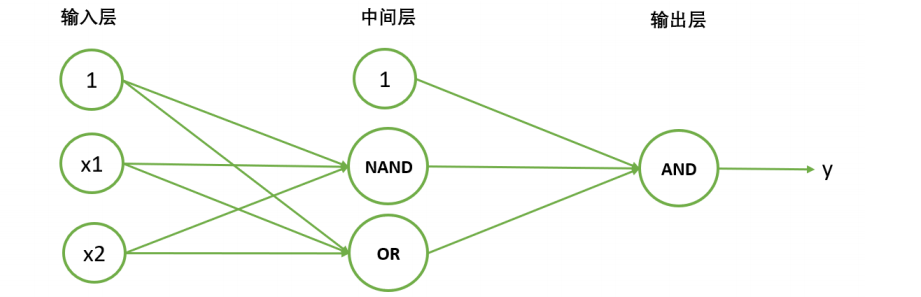

In [ ]:
#1.4异或门实现
import torch

# 输入数据（4 个样本，包含偏置项 x0=1）
X = torch.tensor([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=torch.float32)

# 定义 NAND 门
def NAND(X):
    w = torch.tensor([1.5, -1.0, -1.0], dtype=torch.float32)  # NAND 权重
    zhat = torch.mv(X, w)
    return torch.tensor([int(x) for x in zhat >= 0], dtype=torch.float32)

# 定义 OR 门
def OR(X):
    w = torch.tensor([-0.1, 0.2, 0.2], dtype=torch.float32)  # OR 权重
    zhat = torch.mv(X, w)
    return torch.tensor([int(x) for x in zhat >= 0], dtype=torch.float32)

# 定义 AND 门
def AND(X):
    w = torch.tensor([-0.2, 0.15, 0.15], dtype=torch.float32)  # AND 权重
    zhat = torch.mv(X, w)
    return torch.tensor([int(x) for x in zhat >= 0], dtype=torch.float32)

# 第一层：计算 NAND 和 OR 的输出
x0 = torch.tensor([1, 1, 1, 1], dtype=torch.float32)  # 偏置列
x2 = NAND(X)  # NAND 输出
x3 = OR(X)    # OR 输出

# 拼接为第二层的输入（形状 [4, 3]）
input2_X = torch.cat([x0.view(-1, 1), x2.view(-1, 1), x3.view(-1, 1)], dim=1)

# 第二层：通过 AND 门计算 XOR 输出
y = AND(input2_X)  # XOR 的最终输出

# 打印结果
print("第二层输入（NAND 和 OR 的输出）:\n", input2_X)
print("XOR 输出:\n", y)

第二层输入（NAND 和 OR 的输出）:
 tensor([[1., 1., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 0., 1.]])
XOR 输出:
 tensor([0., 1., 1., 0.])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18144\1830046700.py:55: UserWarning: Glyph 36923 (\N{CJK UNIFIED IDEOGRAPH-903B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18144\1830046700.py:55: UserWarning: Glyph 36753 (\N{CJK UNIFIED IDEOGRAPH-8F91}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18144\1830046700.py:55: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18144\1830046700.py:55: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18144\1830046700.py:55: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_181

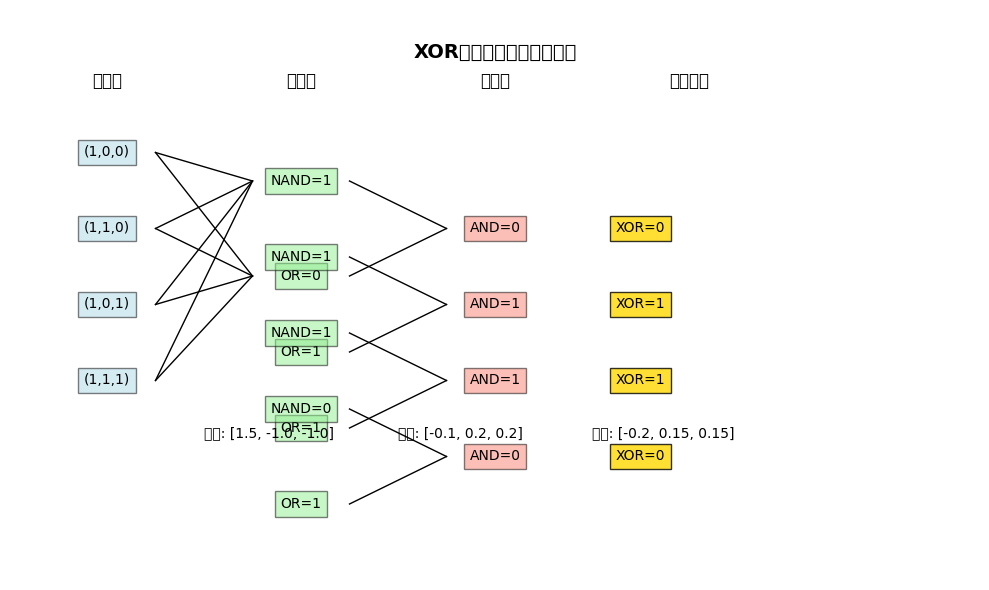

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle

# 创建画布
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
plt.axis('off')

# 绘制标题
plt.text(5, 5.5, 'XOR逻辑的多层感知机实现', ha='center', fontsize=14, weight='bold')

# 绘制输入层 (4个样本)
input_labels = ['(1,0,0)', '(1,1,0)', '(1,0,1)', '(1,1,1)']
for i in range(4):
    plt.text(1, 4.5-i*0.8, input_labels[i], ha='center', va='center', bbox=dict(facecolor='lightblue', alpha=0.5))
    plt.plot([1.5, 2.5], [4.5-i*0.8, 4.2], 'k-', lw=1)  # 输入到NAND
    plt.plot([1.5, 2.5], [4.5-i*0.8, 3.2], 'k-', lw=1)  # 输入到OR

# 绘制隐藏层 (NAND和OR)
nand_results = [1, 1, 1, 0]
or_results = [0, 1, 1, 1]
for i in range(4):
    # NAND节点
    plt.text(3, 4.2-i*0.8, f'NAND={nand_results[i]}', ha='center', va='center', 
             bbox=dict(facecolor='lightgreen', alpha=0.5))
    # OR节点
    plt.text(3, 3.2-i*0.8, f'OR={or_results[i]}', ha='center', va='center',
             bbox=dict(facecolor='lightgreen', alpha=0.5))
    # 连接到AND
    plt.plot([3.5, 4.5], [4.2-i*0.8, 3.7-i*0.8], 'k-', lw=1)  # NAND到AND
    plt.plot([3.5, 4.5], [3.2-i*0.8, 3.7-i*0.8], 'k-', lw=1)  # OR到AND

# 绘制输出层 (AND/XOR)
xor_results = [0, 1, 1, 0]
for i in range(4):
    plt.text(5, 3.7-i*0.8, f'AND={xor_results[i]}', ha='center', va='center',
             bbox=dict(facecolor='salmon', alpha=0.5))
    plt.text(6.5, 3.7-i*0.8, f'XOR={xor_results[i]}', ha='center', va='center',
             bbox=dict(facecolor='gold', alpha=0.8))

# 添加层标签
plt.text(1, 5.2, '输入层', ha='center', fontsize=12)
plt.text(3, 5.2, '隐藏层', ha='center', fontsize=12)
plt.text(5, 5.2, '输出层', ha='center', fontsize=12)
plt.text(7, 5.2, '最终结果', ha='center', fontsize=12)

# 添加连接线说明
plt.text(2, 1.5, '权重: [1.5, -1.0, -1.0]', fontsize=10)
plt.text(4, 1.5, '权重: [-0.1, 0.2, 0.2]', fontsize=10)
plt.text(6, 1.5, '权重: [-0.2, 0.15, 0.15]', fontsize=10)

plt.tight_layout()
plt.show()
